# Shopify Challenge Q1

Given some sample data, write a program to answer the following.

In [1]:
# Upload the data
import pandas as pd
data = pd.read_csv('2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [2]:
data["value_per_item"] = data["order_amount"]/data["total_items"]

In [3]:
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,value_per_item
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0


In [4]:
data

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,value_per_item
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0
...,...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17,165.0
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16,117.0
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42,117.0
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18,177.0


## AOV from the challenge

In [5]:
order_amount_total = data["order_amount"].sum()
aov = round(order_amount_total / len(data.index), 2)
aov

3145.13

This was the AOV calculated from the challenge "3145.13" for the original dataset.

## Find the outliers

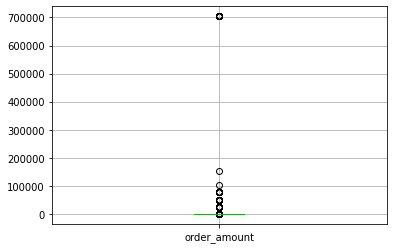

In [6]:
boxplot = data.boxplot(column=["order_amount"])

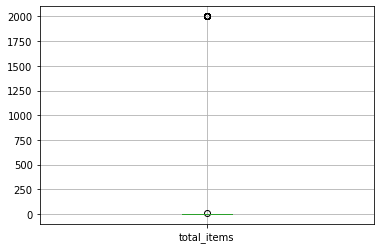

In [7]:
boxplot = data.boxplot(column=["total_items"])

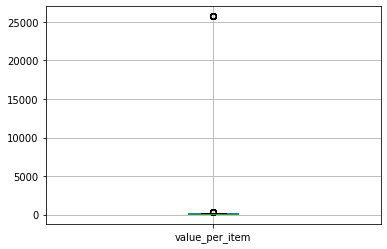

In [8]:
boxplot = data.boxplot(column=["value_per_item"])

## Q1. a.

Q1. a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

Answer to the Q1. a:

As we can see from the boxplots, there are outliers from the columns "order_amount", "total_items" and "value_per_item". I added one more column additionally, which is called "value_per_item" and represents the value of each item.

 - In the column of "order_amount" the outliers are 704.000
 - In the column of "total_items" the outliers are 2.000
 - In the column of "value_per_item" the outliers are 25.725 

There are two abnormal high values:
- The orders with shop_id 78 have very high order amount, because each snicker costs 25.725 (= value_per_item)
- The orders with user_id 607 have very high order amount, because the user has placed very high orders.

These two outliers caused the AOV to be much higher than expected.

## Q1. b.

Q1. b. What metric would you report for this dataset?

Answer to Q1.b: 
With the abnormal values (outliers), the AOV was calculated too high, thus we couldn't see the right picture of the whole dataset. I decided to remove these outliers and calculate the AOV again, since I can see here the outliers very clear.

(If I couldn't see the outliers so well, I would calculate the IQR (interquartile range) and multiply 1.5. to define the outliers exactly.)

## Q1. c.

Q1. c. What is its value?

Firstly, I tried to calculate the IQR to define the outliers from the dataset.

In [9]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

In [10]:
outliers.loc[outliers["order_amount"] == True]

,created_at,order_amount,order_id,payment_method,shop_id,total_items,user_id,value_per_item
15,False,True,False,False,False,True,False,True
60,False,True,False,False,False,True,False,True
99,False,True,False,False,False,False,False,False
136,False,True,False,False,False,False,False,False
160,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...
4918,False,True,False,False,False,False,False,True
4927,False,True,False,False,False,False,False,False
4952,False,True,False,False,False,False,False,False
4958,False,True,False,False,False,False,False,False


In [11]:
outliers.sum()

created_at          0
order_amount      141
order_id            0
payment_method      0
shop_id             0
total_items        18
user_id             0
value_per_item     97
dtype: int64

According to the calculation, there should be 141 outliers for the column of "order_amount". Checking the dataset manually, 141 outliers include too many rows, which can still represent the normal order_amount. Thus, I decided to exclude only the orders as follows:
- In the column of "order_amount" with 704.000 (shop_id: 78)
- In the column of "total_items" with 2.000 (user_id: 607)
- In the column of "value_per_item" with 25.725 (shop_id: 78)

In [12]:
# copy the dataset
data1 = data.copy()

In [13]:
# filter the index of the rows with shop_id 78
indexNames = data[data['shop_id'] == 78].index

In [14]:
# drop the rows with shop_id 78
data1.drop(indexNames, inplace=True)

In [15]:
# new data1 without shop_id 78
data1

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,value_per_item
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0
...,...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17,165.0
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16,117.0
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42,117.0
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18,177.0


In [16]:
# filter the index of the rows with user_id 607
indexNames2 = data[data['user_id'] == 607].index

In [17]:
# drop the rows with user_id 607
data1.drop(indexNames2, inplace=True)

In [18]:
# new data1 without user_id 607 and shop_id 78
data1

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,value_per_item
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0
...,...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17,165.0
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16,117.0
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42,117.0
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18,177.0


In [19]:
order_amount_total2 = data1["order_amount"].sum()
aov4 = round(order_amount_total2 / len(data1.index), 2)
aov4

302.58

The value is 302.58 